# **Cети c Обратными Связями**

# 1.1 Сеть Хопфилда

https://github.com/ccd97/hello_nn/blob/master/Hopfield-Network/np_hnn_reconstruction.ipynb

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline

функция для отображения символов

In [33]:
def plot_images(images, title, no_i_x, no_i_y=3):
    fig = plt.figure(figsize=(10, 15))
    # fig.set_title(title)
    images = np.array(images).reshape(-1, 5, 5)
    images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("исходный")
            elif j == 0 and i == 1:
                ax.set_title("искажение")
            elif j == 0 and i == 2:
                ax.set_title("реконструкция")

Коды символов

In [34]:
perfect_data = {
    "P": [1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
    "Y": [1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "T": [1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "H": [1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
    "O": [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1],
    "N": [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1]
}

### **число нейронов**
0.138 * n_neurons = 0.138 * 25 = 3.45 ~ 3 

In [35]:

n_train = 3
n_test = 100


#число выводимых ответов
n_train_disp = 10

#коэффициент искажения (0 < distort < 1)
distort = 0.1

#рзмер картинки(width)
n_side = 5

#число нейронов
n_neurons = n_side * n_side

In [36]:
train_data = [np.array(d) for d in perfect_data.values()][:n_train]

Строим тестовые данные с шумом

In [37]:
test_data = []
for d in range(n_test):
    r_i = np.random.randint(0, n_train)
    base_pattern = np.array(train_data[r_i])
    noise = 1 * (np.random.random(base_pattern.shape) > distort)
    np.place(noise, noise == 0, -1)
    noisy_pattern = np.multiply(base_pattern, noise)
    test_data.append((base_pattern, noisy_pattern))

In [38]:
noise

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [39]:
test_data[0]

(array([ 1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        -1, -1, -1,  1, -1, -1, -1, -1]),
 array([ 1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        -1, -1, -1,  1,  1, -1, -1,  1]))

## 1.2 Реализация

обучение по Хеббу dW=D[i,:]''* D[i,:] ( размер число_нейронов х число_нейронов ), w(i,i)=0

In [40]:
def train(neu, training_data):
    w = np.zeros([neu, neu])
    for data in training_data:
        w += np.outer(data, data)
    for diag in range(neu):
        w[diag][diag] = 0  # условие устойчивости
    return w

Тестирование

In [41]:
def test(weights, testing_data, steps=5):
    success = 0.0

    output_data = []

    for data in testing_data:
        true_data = data[0]
        noisy_data = data[1]
        predicted_data = retrieve_pattern(weights, noisy_data, steps)
        if np.array_equal(true_data, predicted_data):
            success += 1.0
        output_data.append([true_data, noisy_data, predicted_data])

    return (success / len(testing_data)), output_data

функция сети (step шагов моделирования переходного процесса)

In [42]:
def retrieve_pattern(weights, data, steps=5):
    res = np.array(data)

    for _ in range(steps):
        for i in range(len(res)):
            raw_v = np.dot(weights[i], res)
            # пороговый нейрон
            if raw_v > 0:
                res[i] = 1
            else:
                res[i] = -1
    return res

Обучаем

In [43]:
W = train(n_neurons, train_data)

Тестим

In [44]:
accuracy, op_imgs = test(W, test_data)
print("accuracy сети на тестовых примерах %f" % (accuracy ))

accuracy сети на тестовых примерах 0.970000


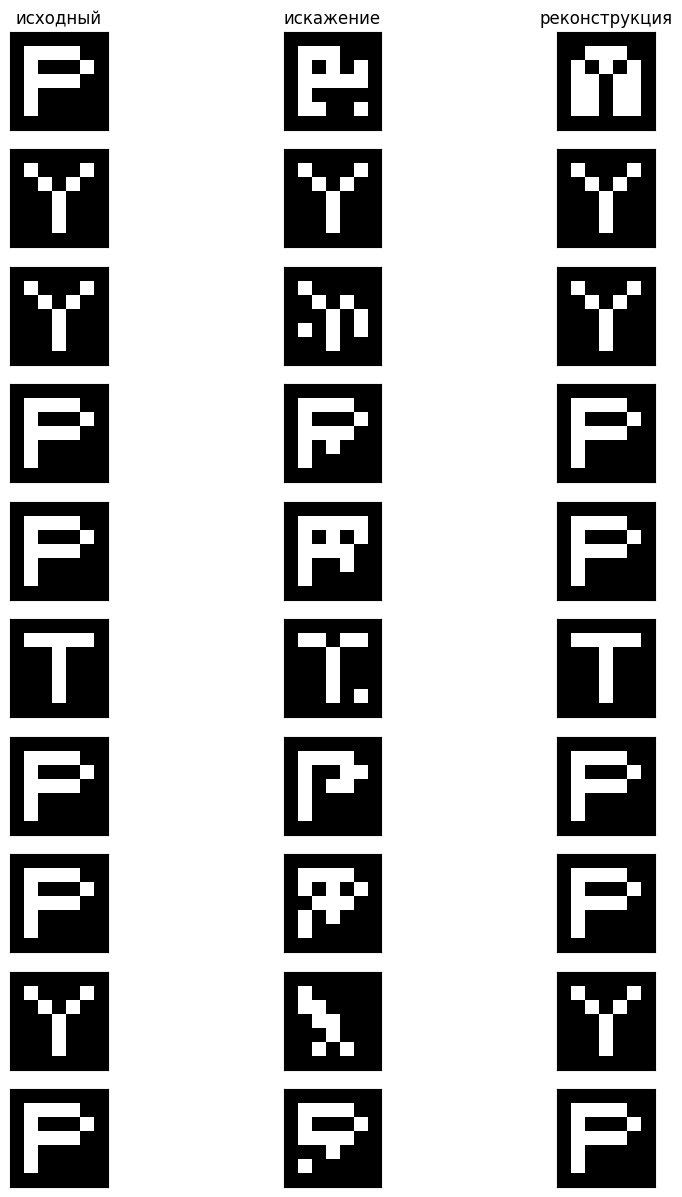

In [45]:
plot_images(op_imgs, "Reconstructed Data", n_train_disp)
plt.show()

## Задание 1.

    1.1 построить связь числа эталонов и качества ответа (n_train)

    1.2 построить связь размера зашумления с качеством ответа (distort)

    1.3 посмотреть ответ на разных шага (step)

In [46]:
def generate_test_data(train_data, n_test, distort, n_neurons):
    test_data = []
    n_train = len(train_data)
    
    for d in range(n_test):
        r_i = np.random.randint(0, n_train)
        base_pattern = np.array(train_data[r_i])
        noise = 1 * (np.random.random(base_pattern.shape) > distort)
        np.place(noise, noise == 0, -1)
        noisy_pattern = np.multiply(base_pattern, noise)
        test_data.append((base_pattern, noisy_pattern))
    
    return test_data

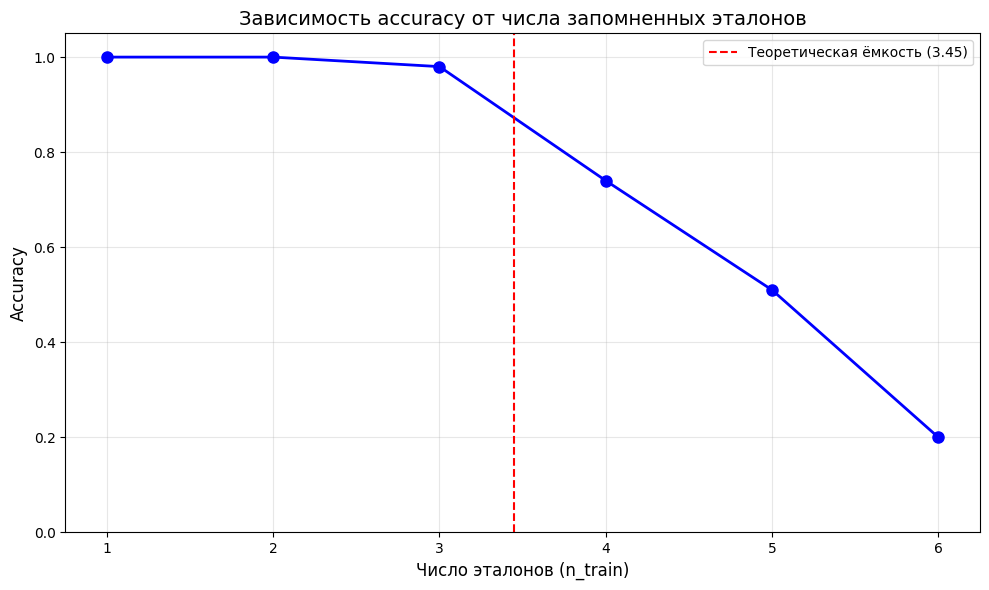

In [47]:
# 1.1
n_side = 5
n_neurons = n_side * n_side
n_test = 100
distort = 0.1
steps = 5

n_train_values = range(1, 7)
accuracies = []

np.random.seed(42)

for n_train in n_train_values:
    train_data = [np.array(d) for d in perfect_data.values()][:n_train]
    test_data = generate_test_data(train_data, n_test, distort, n_neurons)
    W = train(n_neurons, train_data)
    accuracy, _ = test(W, test_data, steps=steps)
    accuracies.append(accuracy)

theoretical_capacity = 0.138 * n_neurons

plt.figure(figsize=(10, 6))
plt.plot(n_train_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=theoretical_capacity, color='r', linestyle='--', 
            label=f'Теоретическая ёмкость ({theoretical_capacity:.2f})')
plt.xlabel('Число эталонов (n_train)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Зависимость accuracy от числа запомненных эталонов', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim([0, 1.05])
plt.xticks(n_train_values)
plt.tight_layout()
plt.show()

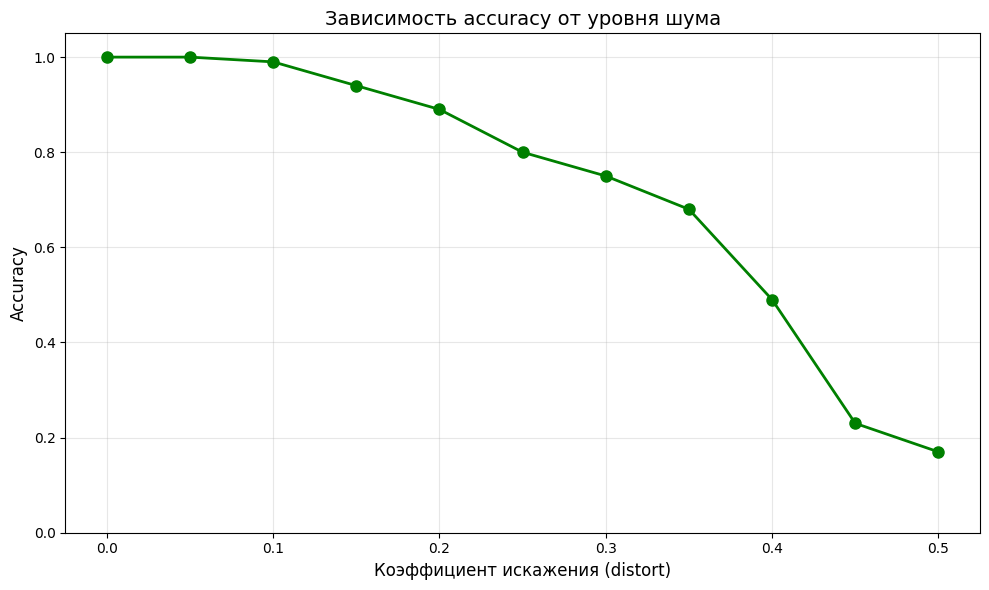

In [51]:
# 1.2
n_side = 5
n_neurons = n_side * n_side
n_train = 3
n_test = 100
steps = 5

distort_values = np.linspace(0, 0.5, 11)
accuracies = []

train_data = [np.array(d) for d in perfect_data.values()][:n_train]
W = train(n_neurons, train_data)

np.random.seed(42)

for distort in distort_values:
    test_data = generate_test_data(train_data, n_test, distort, n_neurons)
    accuracy, _ = test(W, test_data, steps=steps)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(distort_values, accuracies, 'go-', linewidth=2, markersize=8)
plt.xlabel('Коэффициент искажения (distort)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Зависимость accuracy от уровня шума', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1.05])
plt.tight_layout()
plt.show()

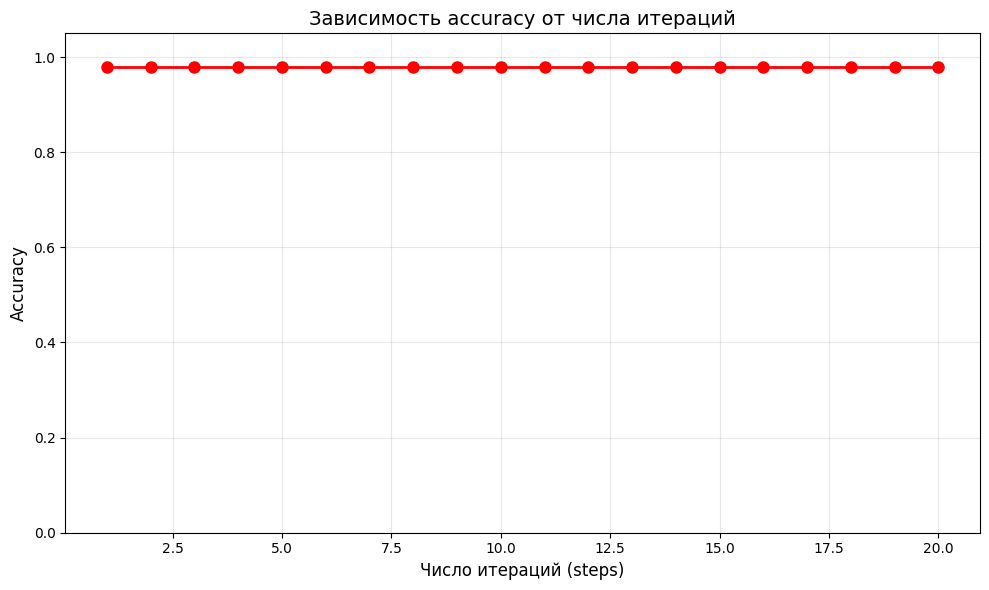

In [50]:
# 1.3
n_side = 5
n_neurons = n_side * n_side
n_train = 3
n_test = 100
distort = 0.1

steps_values = range(1, 21)
accuracies = []

train_data = [np.array(d) for d in perfect_data.values()][:n_train]
W = train(n_neurons, train_data)

np.random.seed(42)
test_data = generate_test_data(train_data, n_test, distort, n_neurons)

for steps in steps_values:
    accuracy, _ = test(W, test_data, steps=steps)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(steps_values, accuracies, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Число итераций (steps)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Зависимость accuracy от числа итераций', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1.05])
plt.tight_layout()
plt.show()

# RNN

# 2.1 Рекурентные сети для обработки последовательностей

что знаем про обработку текстов:
- Компьютер не понимает текст, поэтому нам нужно его как-то закодировать - представить в виде вектора
- В тексте много повторяющихся слов/лишний слов - нужно сделать препроцессинг:
    - удалить знаки препинания
    - удалить стоп-слова
    - привести слова к начальной форме (**стемминг** и **лемматизация**)
    - ???
    
    
- После этого можем представить наш текст (набор слов) в виде вектора, например, стандартными способами:
    - **CounterEncoding** - вектор длины размер нашего словаря
        - есть словарь vocab, который можем включать слова, ngram-ы
        - каждому документу $doc$ ставим в соответствие вектор $vec\ :\ vec[i]=1,\ если\ vocab[i]\ \in\ doc$
    - **HashingVectorizer** - вектор заранее заданной длины
        - каждому документу $doc$ ставим в соответствие вектор $vec\ :\ vec[i]=1,\ если\ \exists\ txt\ \in\ doc:\ hash(text)\ =\ i$
    - **TfIdfVectorizer** - вектор длины размер нашего словаря
        - есть словарь vocab, который можем включать слова, ngram-ы
        - каждому документу $doc$ ставим в соответствие вектор $vec\ :\ vec[i]=tf(vocab[i])*idf(vocab[i]),\ если\ vocab[i]\ \in\ doc$
    
        $$ tf(t,\ d)\ =\ \frac{n_t}{\sum_kn_k} $$
        $$ idf(t,\ D)\ =\ \log\frac{|D|}{|\{d_i\ \in\ D|t\ \in\ D\}|} $$
        
, где 
- $n_t$ - число вхождений слова $t$ в документ, а в знаменателе — общее число слов в данном документе
- $|D|$ — число документов в коллекции;
- $|\{d_i\ \in\ D\mid\ t\in d_i\}|$— число документов из коллекции $D$, в которых встречается $t$ (когда $n_t\ \neq\ 0$).



Это база и она работает. Есть более продвинутые подходы: эмбединги . Но любой текст - это последовательность, и работают с ним как с последовательностью. нужна архитектура, которая будет работать с текстом как с последовательностью, двигаясь по эмбедингам и как-то меняя их значения.

Возьмем перцептрон с входом - эмбедингом слова (пусть пока он фиксированный) и будем пытаться классифицировать каждое слово.

Почему классифицировать? потому что это частая задача в обработке языка + это дает возможность генерировать текст (просто классифицируем на кол-во классов = кол-ву слов в словаре).

<img src="images/Single_layer_perceptron.png">

Какая тут последовательность? никакой, но давайте на вход подавать эмбединг, но в 1 скрытый слой будем добавлять последний скрытый слой предыдущего шага)

<img src="images/Rnnbr.png">

То есть прокидываем информацию с предыдущего шага, а за счет того, что мы все время так объединяем вектора получаем то, что информация проходит через текст от начала до конца. Что делать с 1 шагом? -> Добавим вектор из нулей. И вот мы получили первую рекурентную сеть. Чаще её рисуют следующим образом:


<img src="images/Rnn.png">

Итак, построили простую рекуретную сеть. как её обучать?

Как и в MLP - градиентным спуском, нам нужно двигаться во времени и обновлять параметры, поэтому обучение таких сетей занимает очень много времени (вы не можете обновить веса для 1-го токена, пока не посчитаете градиент сквозь время).

Тренируем такую систему, где промежуточный выход с сети прошлого шага дают на вход сети на следующем шаге. Это значит, что она может выучить некоторое  представление входа. 

## 2.2 как это в коде:

class RNN:

  # ...
  
  def step(self, x):
  
    # update the hidden state
    
    self.h = np.tanh(np.dot(self.W_hh, self.h) + np.dot(self.W_xh, x))
    
    # compute the output vector
    
    y = np.dot(self.W_hy, self.h)
    
    return y


forward, прямой проход. Он выглядит следующим образом:  

- матричное произведение весов W и текущего состояния h
- добавляем тоже произведение весов W на вход x.
- получаем новый h.


- Есть набор X, где t - элементы последовательности. 
- сливаем h и X_t вместе, прогоняем через слой, через функцию активации. и получаем следующие h.

## 2.3 Количество слоев

Можно так же настэкать большое количество слоев, как и везде.
Вот так выглядит рекурентная сеть с несколькими слоями:

<img src="images/layer.png">
<img src="images/layer.png">

То есть обычным образом можно прогнать сигнал через слои сети. И при этом каждый из слоев выдает своему эквивалентному слою в следующей итерации сети некоторое скрытое состояние. Чем больше слоев, тем сеть обладает большей обобщающей способностью. И каждый слой на своем уровне понимания может себе в будущем передать состояние. При этом веса у каждого эквивалентного слоя одни и те же.


## 2.4 Варианты связей

Что делать, если мы хотим классифицировать текст целиком? оставить только последний выход!

<img src="images/RnnTasks.png">

## 2.5 Реализация

y — необработанные входные данные нейронной сети;

р — конечная вероятность: р = softmax(y);

с — истинная метка определенного образца текста, так называемый «правильный» класс;

L — потеря перекрестной энтропии: L = -ln(pc);

Wxh, Whh и Why — три матрицы веса в рассматриваемой нейронной сети;

bh и by — два вектора смещения в рассматриваемой рекуррентной нейронной сети RNN.

(реализация модели в классе Python на https://python-scripts.com/recurrent-neural-network) https://gist.github.com/karpathy/d4dee566867f8291f086


In [52]:
# данные для работы высказывания плохо\хорошо (0\1) - основной класс 0
train_data = {
  'good': True,
  'bad': False,
  'happy': True,
  'sad': False,
  'not good': False,
  'not bad': True,
  'not happy': False,
  'not sad': True,
  'very good': True,
  'very bad': False,
  'very happy': True,
  'very sad': False,
  'i am happy': True,
  'this is good': True,
  'i am bad': False,
  'this is bad': False,
  'i am sad': False,
  'this is sad': False,
  'i am not happy': False,
  'this is not good': False,
  'i am not bad': True,
  'this is not sad': True,
  'i am very happy': True,
  'this is very good': True,
  'i am very bad': False,
  'this is very sad': False,
  'this is very happy': True,
  'i am good not bad': True,
  'this is good not bad': True,
  'i am bad not good': False,
  'i am good and happy': True,
  'this is not good and not happy': False,
  'i am not at all good': False,
  'i am not at all bad': True,
  'i am not at all happy': False,
  'this is not at all sad': True,
  'this is not at all happy': False,
  'i am good right now': True,
  'i am bad right now': False,
  'this is bad right now': False,
  'i am sad right now': False,
  'i was good earlier': True,
  'i was happy earlier': True,
  'i was bad earlier': False,
  'i was sad earlier': False,
  'i am very bad right now': False,
  'this is very good right now': True,
  'this is very sad right now': False,
  'this was bad earlier': False,
  'this was very good earlier': True,
  'this was very bad earlier': False,
  'this was very happy earlier': True,
  'this was very sad earlier': False,
  'i was good and not bad earlier': True,
  'i was not good and not happy earlier': False,
  'i am not at all bad or sad right now': True,
  'i am not at all good or happy right now': False,
  'this was not happy and not good earlier': False,
}

test_data = {
  'this is happy': True,
  'i am good': True,
  'this is not happy': False,
  'i am not good': False,
  'this is not bad': True,
  'i am not sad': True,
  'i am very good': True,
  'this is very bad': False,
  'i am very sad': False,
  'this is bad not good': False,
  'this is good and happy': True,
  'i am not good and not happy': False,
  'i am not at all sad': True,
  'this is not at all good': False,
  'this is not at all bad': True,
  'this is good right now': True,
  'this is sad right now': False,
  'this is very bad right now': False,
  'this was good earlier': True,
  'i was not happy and not good earlier': False,
}

 

In [53]:
# Создание словаря
vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
vocab_size = len(vocab)
 
print('%d unique words found' % vocab_size) # найдено 18 уникальных слов
# Назначить индекс каждому слову
word_to_idx = { w: i for i, w in enumerate(vocab) }
idx_to_word = { i: w for i, w in enumerate(vocab) }
 
print(word_to_idx['good']) # индекс
print(idx_to_word[0]) # слово

18 unique words found
12
sad


In [54]:
# делаем one-hot-encoding для слов текста по каждому слову в список
def createInputs(text):
    #Возвращает массив слова в введенной строке текста
    #   - текст является строкой string
    #   - вектор имеет форму (vocab_size, 1)
    
    inputs = []
    for w in text.split(' '):
        v = np.zeros((vocab_size, 1))
        v[word_to_idx[w]] = 1.0
        inputs.append(v)
    #print(len(inputs))
    return inputs
 
hidden_size_=3
# Классическая рекуррентная нейронная сеть
input_size_=vocab_size
output_size_=1

def init( input_size=vocab_size, output_size=1, hidden_size=hidden_size_):
        # Вес
        #print(input_size,output_size, hidden_size)
        # задаем начальные значения весов и сдвигов (они маленькие и случайные)
        Whh = np.random.randn(hidden_size, hidden_size) / 1000
        Wxh = np.random.randn(hidden_size, input_size) / 1000
        Why = np.random.randn(output_size, hidden_size) / 1000
        #print(Whh.shape, Wxh.shape,Why.shape)
        # Сдвиги
        bh = np.zeros((hidden_size, 1))
        by = np.zeros((output_size, 1))
        return Whh,Wxh,Why,by,bh

# ПРЯМОЙ ПРОХОД
def forward( inputs=None,  Whh=None,Wxh=None,Why=None, by=None, bh=None, i=None):
        #Выполнение передачи нейронной сети при помощи входных данных
        #Возвращение результатов вывода  и скрытого состояния(y,h), 
        # сохранем значения h по узлам в last_hs 
        #hidden_size_=3
        
        #print('Whh:',Whh)
        # инициализируемм сеть для нового примерва - очистка памяти сети
        h = np.zeros((Whh.shape[0], 1))
        #print('h=',h)
        # запускаем новый пример
        last_inputs = inputs
        # сохраняем первое скрытое состояние (самое старое)
        last_hs = { 0: h }
        # тут смотреть как выглядит пример
        #for j in range(len(inputs)):
        #    print(inputs[j].T)
        # Выполнение каждого шага нейронной сети RNN
        for i, x in enumerate(inputs):
            # для каждого примера-предложения отдельно (никаких пакетов)
            # вычисляем скрытое состояние
            h = np.tanh(np.dot(Wxh , x) + np.dot(Whh , h) + bh)
            # записываем его значение в следующую позицию для сохранения
            last_hs[i + 1] = h
            # тоже посмотреть как все движется
            #print('i=',i,'x=',x.T)
            #print('last_h=',last_hs[i+1].T)
            #last_hs
        # вычисляем выхода - строго по формуле
        y = np.dot(Why , h) + by
 
        return y, h  , last_hs

# наша последняя функция на выходе сети (массив из 2-х выходов у - y[0] - класс 0, y[1] - класс 1  )
def softmax(xs=None):
    # Применение функции Softmax для входного массива
    return np.exp(xs)/np.sum(np.exp(xs))
# ОБРАТНОЕ РАСПРОСТРАНЕНИЕ
def backprop( last_inputs=None, last_hs=None, d_y=None, learn_rate=2e-2,Whh=None,Wxh=None,Why=None,by=None, bh=None):
        #Выполнение фазы обратного распространения нейронной сети RNN.
        #####################################
        n = len(last_inputs)# число шагов для этой последовательности 
        #(в нормальных сетях выравнивается методами заполнения, 
        #но мы можем делать как хотим и экономим процедуру обработки данных)

        # Вычисление dL/dWhy и dL/dby.
        d_Why = (d_y * last_hs[n].T)
        d_by = d_y
 
        # Инициализация dL/dWhh, dL/dWxh, и dL/dbh к нулю.
        d_Whh = np.zeros(Whh.shape)
        d_Wxh = np.zeros(Wxh.shape)
        d_bh = np.zeros(bh.shape)
 
        # Вычисление dL/dh для последнего h.
        d_h = np.dot(Why.T ,d_y)

        # Обратное распространение во времени 
        #(идем по всем активным для данной последовательности n узлам).
        for t in reversed(range(n)):
            # считаем: dL/dh * (1 - h^2)
            temp = ((1 - last_hs[t + 1] ** 2) * d_h)
 
            # dL/db = dL/dh * (1 - h^2)
            d_bh += temp
 
            # dL/dWhh = dL/dh * (1 - h^2) * h_{t-1}
            d_Whh += temp * last_hs[t].T
 
            # dL/dWxh = dL/dh * (1 - h^2) * x
            d_Wxh += temp*last_inputs[t].T
 
            #dL/dh = dL/dh * (1 - h^2) * Whh
            d_h = np.dot(Whh, temp)
            
            #закончили проход узла и идем к следующем
        
        # можно посмотреть как отработал шаг до конца    
        #print([d_Whh,d_Wxh,d_Why,d_by, d_bh])
        
        #ограничиваем рост (взрыв градиента) для Keras sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
        for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
            np.clip(d, -1, 1, out=d)
            
        
        # Обновляем вес и смещение с использованием градиентного спуска 
        #(все как обычно - можно брать алгоритмы с адаптацией шага и моментами).
        
        Whh -= learn_rate * d_Whh
        Wxh -= learn_rate * d_Wxh
        Why -= learn_rate * d_Why
        bh -= learn_rate * d_bh
        by -= learn_rate * d_by

        
        # вернем все параметры нашей сети
        
        return Whh,Wxh,Why,by, bh


In [55]:
# переходим к запуску всего процесса целиком   

# начальные ошибки и точность
loss = []
num_correct = []
loss_test = []
num_correct_test = []
inputs_=train_data
print()
target_=[]
W=[]

# Цикл для каждого примера тренировки по всем эпохам
whh, wxh, why, by, bh =init(input_size=vocab_size, output_size=2, hidden_size=hidden_size_)
last_hs=np.zeros(bh.shape)
# по эпохам
for epoch in range(800):
        train_loss=0
        train_acc =0
        last_hs={}
        #print('epoch=',epoch)
        # по примерам
        for x, y in inputs_.items():
                #print(x,y)
                # строим пример
                inp_x = createInputs(x)
                target = int(y) # строим целевой вектор 0\1 
                
                #ПРЯМОЙ ПРОХОД
                out, h, last_h=forward(inputs=inp_x,Whh=whh,Wxh=wxh,Why=why,by=by,bh=bh)
                #вычислим результат
                probs = softmax(out)
                #print(probs)
                #
                # Считаем производную по потерям dL/dy 
                # 2 выхода probs-1 для того, что должно было быть и probs для второго варианта
                # т.е. если y=True, то  d_L_d_y[1]=probs-1, d_L_d_y[target]  
                d_L_d_y = probs.copy()
                d_L_d_y[target] -= 1
                #print(d_L_d_y)
                # Обратное распространение
                whh,wxh,why,by, bh = backprop(last_inputs=inp_x,d_y=d_L_d_y,last_hs=last_h, learn_rate=2e-2,Whh=whh,Wxh=wxh,Why=why, by=by,bh=bh)
                #print([whh[0,0],wxh[0,0],why[0,0],by[0], bh[0]])
                #print(out,probs,y,np.sum(np.log(probs[1])*y+np.log(probs[0])*(1-y)))
                train_loss -= np.sum(np.log(probs[1])*y+np.log(probs[0])*(1-y))
                train_acc +=int(np.argmax(probs)==y)
                W.append(bh.copy())
        if (epoch % 50) == 49:
            print("входной текст:",x, ", длина последовательности на входе: ", len(inp_x), ", длина вектора в последовательности: ", len(inp_x[0]))
            test_loss = 0
            test_acc = 0
            y_p = []
            y_t = []
            for x, y in test_data.items():
                inp_x = createInputs(x)
                target = int(y) # строим целевой вектор 0\1 
                #print((whh))

                out, h, last_h=forward(inputs=inp_x,Whh=whh,Wxh=wxh,Why=why,by=by,bh=bh)
                #print('ghhgghhg:  ',x,y,': --- ',h.shape)
                probs = softmax(out)
                y_p.append(probs[:,0].tolist())
                test_loss -= np.sum(np.log(probs[1])*y+np.log(probs[0])*(1-y))
                test_acc +=int(np.argmax(probs)==y)  
                y_t.append(y)
            
            print('Эпоха %d' % (epoch + 1))
            print('Train:\tошибка %.3f | Accuracy: %.3f' % (train_loss/len(train_data.items()), train_acc/len(train_data.items())))

            print('Test:\tошибка %.3f | Accuracy: %.3f' % (test_loss/len(test_data.items()), test_acc/len(test_data.items())))
            loss.append(train_loss/len(train_data.items()))
            num_correct.append(train_acc/len(train_data.items())) 
            loss_test.append(test_loss/len(test_data.items()))
            num_correct_test.append(test_acc/len(test_data.items())) 
W=np.array(W)
loss_test=np.array(loss_test)
num_correct_test=np.array(num_correct_test)
loss=np.array(loss)
num_correct=np.array(num_correct)


входной текст: this was not happy and not good earlier , длина последовательности на входе:  8 , длина вектора в последовательности:  18
Эпоха 50
Train:	ошибка 0.693 | Accuracy: 0.552
Test:	ошибка 0.700 | Accuracy: 0.500
входной текст: this was not happy and not good earlier , длина последовательности на входе:  8 , длина вектора в последовательности:  18
Эпоха 100
Train:	ошибка 0.692 | Accuracy: 0.552
Test:	ошибка 0.700 | Accuracy: 0.500
входной текст: this was not happy and not good earlier , длина последовательности на входе:  8 , длина вектора в последовательности:  18
Эпоха 150
Train:	ошибка 0.686 | Accuracy: 0.569
Test:	ошибка 0.700 | Accuracy: 0.500
входной текст: this was not happy and not good earlier , длина последовательности на входе:  8 , длина вектора в последовательности:  18
Эпоха 200
Train:	ошибка 0.680 | Accuracy: 0.569
Test:	ошибка 0.718 | Accuracy: 0.450
входной текст: this was not happy and not good earlier , длина последовательности на входе:  8 , длина вектора в

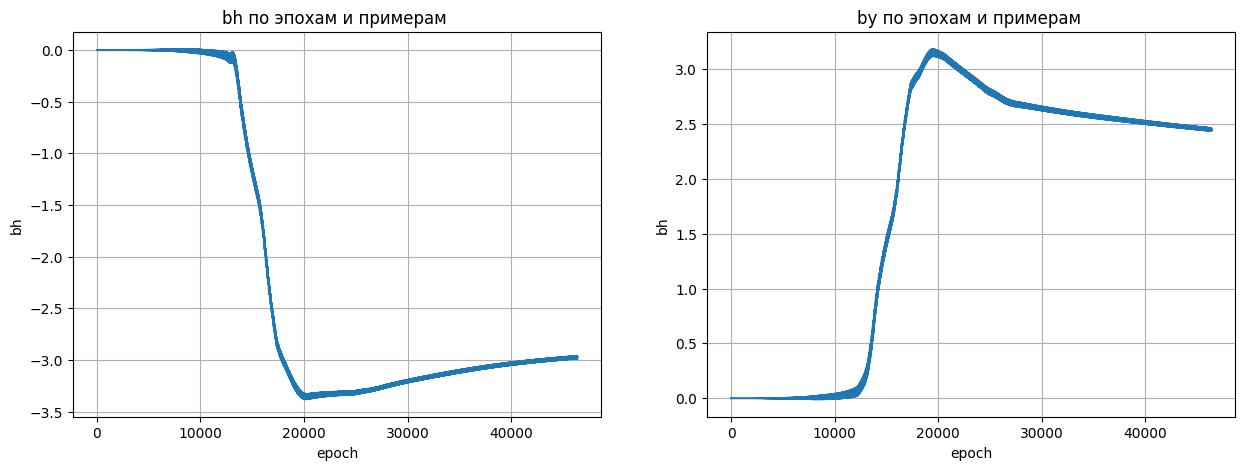

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('bh по эпохам и примерам ')
plt.xlabel('epoch')
plt.ylabel('bh')
plt.grid()
plt.plot(W[:,1,0])
plt.subplot(1,2,2)
plt.plot(W[:,0,0])
plt.title('by по эпохам и примерам ')
plt.xlabel('epoch')
plt.ylabel('bh')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


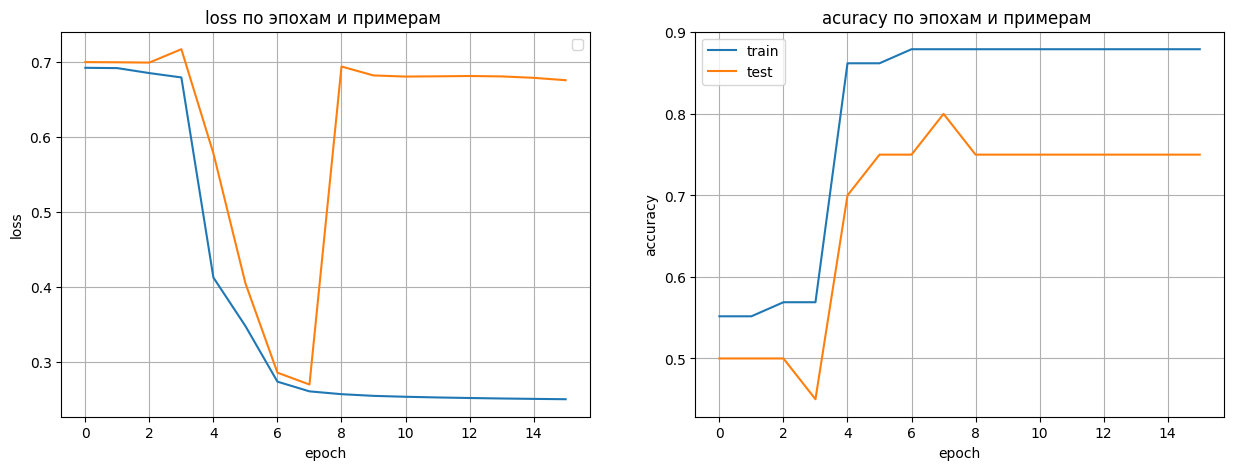

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('loss по эпохам и примерам ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.plot(loss,label='train')
plt.plot(loss_test,label='test')
plt.subplot(1,2,2)
plt.plot(num_correct,label='train')

plt.plot(num_correct_test,label='test')
plt.title('acuracy по эпохам и примерам ')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

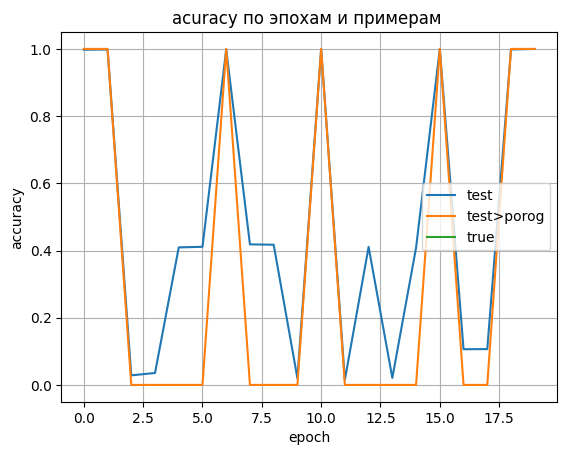

In [58]:
y_pred = np.argmax(y_p, axis=1)
probs=np.array(y_p)
y_list = y
plt.plot(np.array(probs[:,1]), label='test')
plt.plot(np.array(y_pred),label='test>porog')
plt.plot(np.array(y_list),label='true')
plt.title('acuracy по эпохам и примерам ')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

## Задание 2.

    1.1 оценить связь качества с hiden_size
    1.2 оценть изменение качества от скорости обучения (learn_rate)
    1.3 заменить на векторизацию из sklearn (CountVectorize, TFiDFVectorize) и оценить изменение качества  (рассмотреть как работает TFiDF)
    

In [80]:
class RNN:
    def __init__(self, hidden_size=3, lr=2e-2, vectorizer=None):
        self.hidden_size = hidden_size
        self.lr = lr
        self.vectorizer = vectorizer
        
        self.vocab = None
        self.vocab_size = None
        self.word_to_idx = None
        self.idx_to_word = None
        self.input_size = None
        
        self.Whh = None
        self.Wxh = None
        self.Why = None
        self.bh = None
        self.by = None
        
    def build_vocab(self, train_data):
        self.vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
        self.vocab_size = len(self.vocab)
        self.word_to_idx = {w: i for i, w in enumerate(self.vocab)}
        self.idx_to_word = {i: w for i, w in enumerate(self.vocab)}
        
    def init_weights(self, input_size, output_size):
        self.Whh = np.random.randn(self.hidden_size, self.hidden_size) / 1000
        self.Wxh = np.random.randn(self.hidden_size, input_size) / 1000
        self.Why = np.random.randn(output_size, self.hidden_size) / 1000
        self.bh = np.zeros((self.hidden_size, 1))
        self.by = np.zeros((output_size, 1))
        
    def create_inputs_onehot(self, text):
        inputs = []
        for w in text.split(' '):
            if w in self.word_to_idx:
                v = np.zeros((self.vocab_size, 1))
                v[self.word_to_idx[w]] = 1.0
                inputs.append(v)
        if len(inputs) == 0:
            v = np.zeros((self.vocab_size, 1))
            inputs.append(v)
        return inputs
    
    def create_inputs_sklearn(self, text):
        inputs = []
        for w in text.split(' '):
            vec = self.vectorizer.transform([w]).toarray().T
            inputs.append(vec)
        if len(inputs) == 0:
            vec = np.zeros((self.input_size, 1))
            inputs.append(vec)
        return inputs
    
    def forward(self, inputs):
        h = np.zeros((self.hidden_size, 1))
        last_hs = {0: h}
        
        for i, x in enumerate(inputs):
            h = np.tanh(np.dot(self.Wxh, x) + np.dot(self.Whh, h) + self.bh)
            last_hs[i + 1] = h
            
        y = np.dot(self.Why, h) + self.by
        return y, h, last_hs
    
    def softmax(self, xs):
        return np.exp(xs) / np.sum(np.exp(xs))
    
    def backprop(self, last_inputs, last_hs, d_y):
        n = len(last_inputs)
        
        d_Why = d_y * last_hs[n].T
        d_by = d_y
        
        d_Whh = np.zeros(self.Whh.shape)
        d_Wxh = np.zeros(self.Wxh.shape)
        d_bh = np.zeros(self.bh.shape)
        
        d_h = np.dot(self.Why.T, d_y)
        
        for t in reversed(range(n)):
            temp = ((1 - last_hs[t + 1] ** 2) * d_h)
            d_bh += temp
            d_Whh += temp * last_hs[t].T
            d_Wxh += temp * last_inputs[t].T
            d_h = np.dot(self.Whh, temp)
        
        for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
            np.clip(d, -1, 1, out=d)
        
        self.Whh -= self.lr * d_Whh
        self.Wxh -= self.lr * d_Wxh
        self.Why -= self.lr * d_Why
        self.bh -= self.lr * d_bh
        self.by -= self.lr * d_by
    
    def fit(self, train_data, epochs=800, verbose=False):
        if self.vectorizer is None:
            self.build_vocab(train_data)
            self.input_size = self.vocab_size
            create_inputs = self.create_inputs_onehot
        else:
            texts = list(train_data.keys())
            self.vectorizer.fit(texts)
            self.input_size = len(self.vectorizer.get_feature_names_out())
            create_inputs = self.create_inputs_sklearn
        
        self.init_weights(input_size=self.input_size, output_size=2)
        
        history = {'train_loss': [], 'train_acc': []}
        verbose_step = epochs // 16
        
        for epoch in range(epochs):
            train_loss = 0
            train_acc = 0
            
            for x, y in train_data.items():
                inp_x = create_inputs(x)
                target = int(y)
                
                out, h, last_h = self.forward(inp_x)
                probs = self.softmax(out)
                
                d_L_d_y = probs.copy()
                d_L_d_y[target] -= 1
                
                self.backprop(inp_x, last_h, d_L_d_y)
                
                train_loss -= np.sum(np.log(probs[1]) * y + np.log(probs[0]) * (1 - y))
                train_acc += int(np.argmax(probs) == y)
            
            train_loss /= len(train_data)
            train_acc /= len(train_data)
            
            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)
            
            if verbose and (epoch % verbose_step) == (verbose_step - 1):
                print(f'Epoch {epoch + 1}: Loss {train_loss:.3f} | Acc {train_acc:.3f}')
        
        return history
    
    def predict(self, text):
        if self.vectorizer is None:
            inp_x = self.create_inputs_onehot(text)
        else:
            inp_x = self.create_inputs_sklearn(text)
        
        out, h, last_h = self.forward(inp_x)
        probs = self.softmax(out)
        return np.argmax(probs), probs
    
    def evaluate(self, test_data):
        test_loss = 0
        test_acc = 0
        
        for x, y in test_data.items():
            if self.vectorizer is None:
                inp_x = self.create_inputs_onehot(x)
            else:
                inp_x = self.create_inputs_sklearn(x)
            
            target = int(y)
            out, h, last_h = self.forward(inp_x)
            probs = self.softmax(out)
            
            test_loss -= np.sum(np.log(probs[1]) * y + np.log(probs[0]) * (1 - y))
            test_acc += int(np.argmax(probs) == y)
        
        test_loss /= len(test_data)
        test_acc /= len(test_data)
        
        return test_loss, test_acc

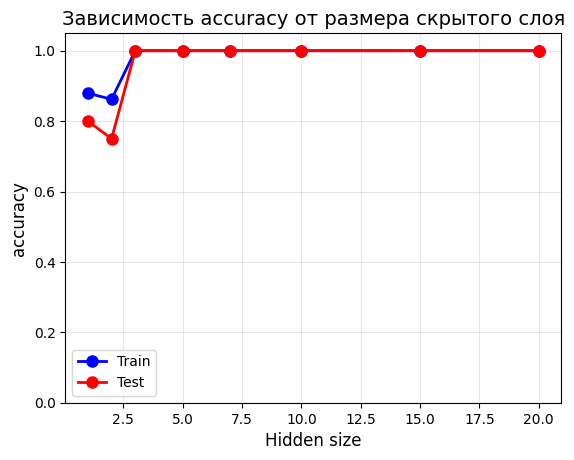

In [81]:
# 2.1
hidden_sizes = [1, 2, 3, 5, 7, 10, 15, 20]
train_accs = []
test_accs = []

np.random.seed(42)

for hs in hidden_sizes:
    rnn = RNN(hidden_size=hs, lr=2e-2)
    rnn.fit(train_data, epochs=800)
    
    _, train_acc = rnn.evaluate(train_data)
    _, test_acc = rnn.evaluate(test_data)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

plt.plot(hidden_sizes, train_accs, 'bo-', linewidth=2, markersize=8, label='Train')
plt.plot(hidden_sizes, test_accs, 'ro-', linewidth=2, markersize=8, label='Test')
plt.xlabel('Hidden size', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('Зависимость accuracy от размера скрытого слоя', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim([0, 1.05])
plt.show()

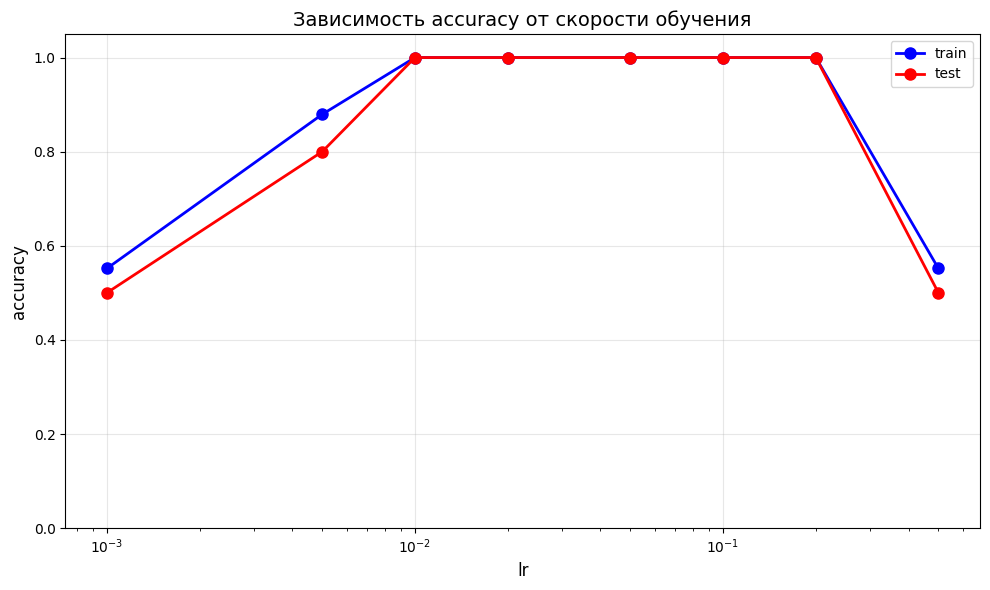

In [82]:
# 2.2
learning_rates = [1e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 5e-1]
train_accs = []
test_accs = []

np.random.seed(42)

for lr in learning_rates:
    rnn = RNN(hidden_size=3, lr=lr)
    rnn.fit(train_data, epochs=800)
    
    _, train_acc = rnn.evaluate(train_data)
    _, test_acc = rnn.evaluate(test_data)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)

plt.figure(figsize=(10, 6))
plt.semilogx(learning_rates, train_accs, 'bo-', linewidth=2, markersize=8, label='train')
plt.semilogx(learning_rates, test_accs, 'ro-', linewidth=2, markersize=8, label='test')
plt.xlabel('lr', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('Зависимость accuracy от скорости обучения', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim([0, 1.05])
plt.tight_layout()
plt.show()

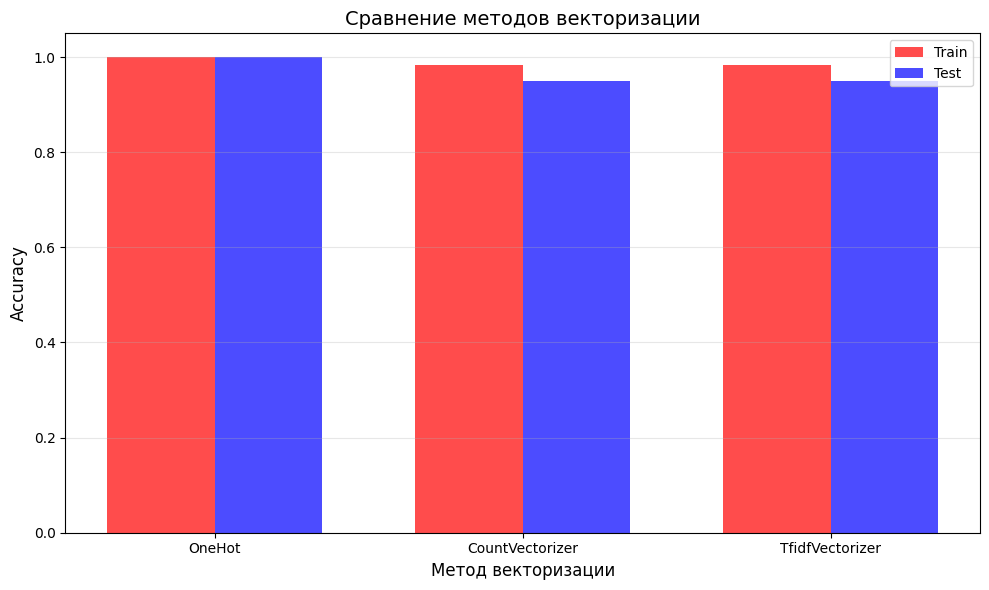

In [84]:
# 2.3
methods = ['OneHot', 'CountVectorizer', 'TfidfVectorizer']
train_accs = []
test_accs = []

np.random.seed(42)

rnn_onehot = RNN(hidden_size=5, lr=2e-2)
rnn_onehot.fit(train_data, epochs=800)
_, train_acc = rnn_onehot.evaluate(train_data)
_, test_acc = rnn_onehot.evaluate(test_data)
train_accs.append(train_acc)
test_accs.append(test_acc)

np.random.seed(42)
count_vec = CountVectorizer()
rnn_count = RNN(hidden_size=5, lr=2e-2, vectorizer=count_vec)
rnn_count.fit(train_data, epochs=800)
_, train_acc = rnn_count.evaluate(train_data)
_, test_acc = rnn_count.evaluate(test_data)
train_accs.append(train_acc)
test_accs.append(test_acc)

np.random.seed(42)
tfidf_vec = TfidfVectorizer()
rnn_tfidf = RNN(hidden_size=5, lr=2e-2, vectorizer=tfidf_vec)
rnn_tfidf.fit(train_data, epochs=800)
_, train_acc = rnn_tfidf.evaluate(train_data)
_, test_acc = rnn_tfidf.evaluate(test_data)
train_accs.append(train_acc)
test_accs.append(test_acc)

x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, train_accs, width, label='Train', color='red', alpha=0.7)
ax.bar(x + width/2, test_accs, width, label='Test', color='blue', alpha=0.7)

ax.set_xlabel('Метод векторизации', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Сравнение методов векторизации', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

## Задание 3.

1. провести моделирование данных для задачи предсказания значения функции по n предидущим



**Функция**

Text(0, 0.5, 'x')

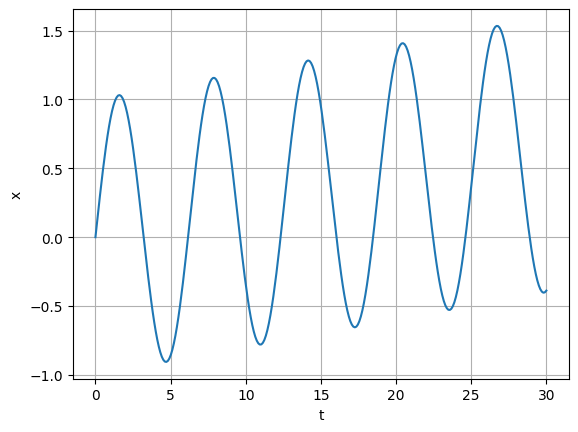

In [85]:
N = 300
t = np.linspace(0,30,N).reshape((N,1))
x = np.sin(t) + t*0.02
plt.plot(t, x)
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

Пример 1: Сборка данных напрямую:

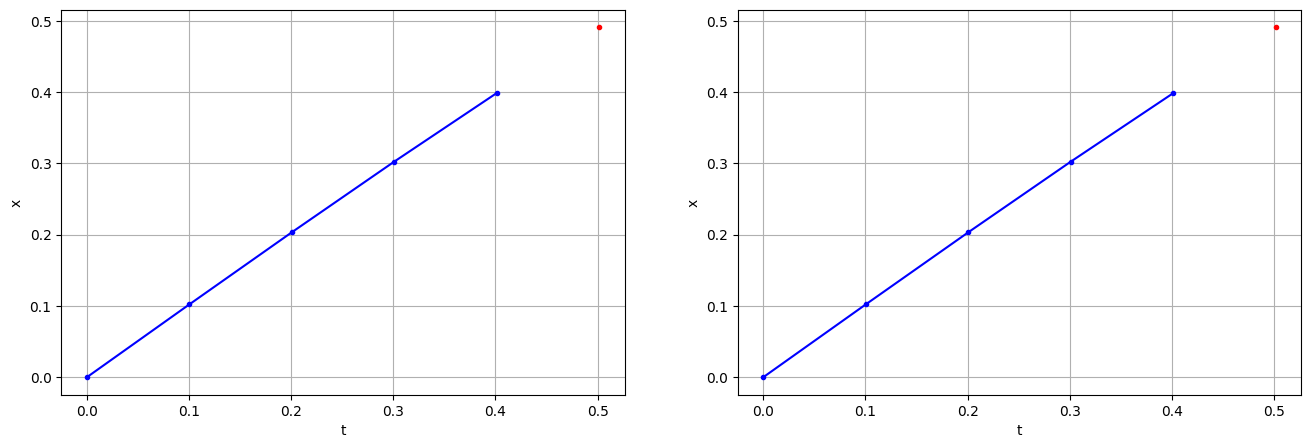

((5,), (294, 5, 2))

In [86]:
N = 300
t = np.linspace(0,30,N).reshape((N,1))
x = np.sin(t) + t*0.02
n = 2 # длина вектора примера([t, x]) -  варьируемый параметр
xLen = 5 # длина последовательности -  варьируемый параметр



h = 1  # горизонт прогноза -  варьируемый параметр
# TRAIN
xx = []
y = []
inputs_ = []
for i in range(N-xLen - h):
    xx.append(np.concatenate( (t[i:xLen+i],x[i:xLen+i])).reshape((xLen,2)))
    y.append(x[i+h+xLen-1])
    x_in = [np.array([t[i+j][0],x[i+j][0]]) for j in range(xLen)] 
    inputs_.append([x_in, x[i+h+xLen-1]])
xx = np.array(xx)  
y = np.array(y)

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(t[0:xLen],x[0:xLen],'.-b')
plt.plot(t[xLen+h-1],y[0],'.r')
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1,2,2)
x_y = inputs_[0]
tt = np.array(x_y[0])[:, 0]
y = np.array(x_y[0])[:, 1]
plt.plot(tt,y,'.-b')
plt.plot(tt[-1]+30/N,x_y[1],'.r')
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

plt.show()
y.shape,xx.shape 

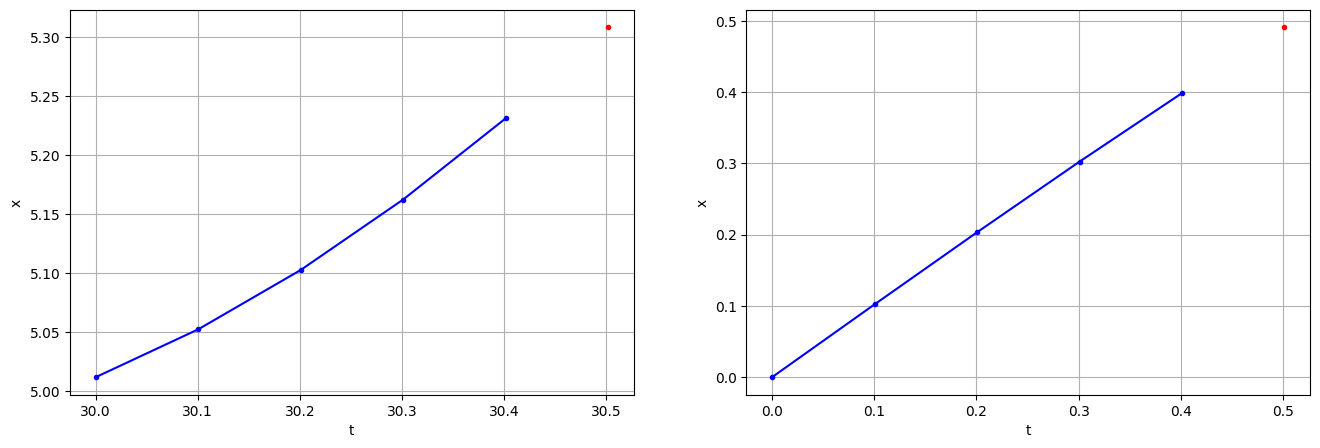

((5,), (294, 5, 2))

In [87]:
## TEST
t = np.linspace(30,60,N).reshape((N,1))
x = np.sin(t) + t*0.2

xx = []
y = []
inputs_test = []
for i in range(N-xLen - h):
    xx.append(np.concatenate( (t[i:xLen+i],x[i:xLen+i])).reshape((xLen,2)))
    y.append(x[i+h+xLen-1])
    x_in = [np.array([t[i+j][0],x[i+j][0]]) for j in range(xLen-1)]
    inputs_test.append([x_in, x[i+h+xLen-1]])
xx = np.array(xx)  
y = np.array(y)
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(t[0:xLen],x[0:xLen],'.-b')
plt.plot(t[xLen+h-1],y[0],'.r')
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1,2,2)
x_y = inputs_[0]
tt = np.array(x_y[0])[:, 0]
y = np.array(x_y[0])[:, 1]
plt.plot(tt,y,'.-b')
plt.plot(tt[-1]+30/N,x_y[1],'.r')
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

plt.show()
y.shape,xx.shape 

Пример 2: Разностная схема построения примера (на вход вектор разниц с последней известной точкой и сама эта точка):

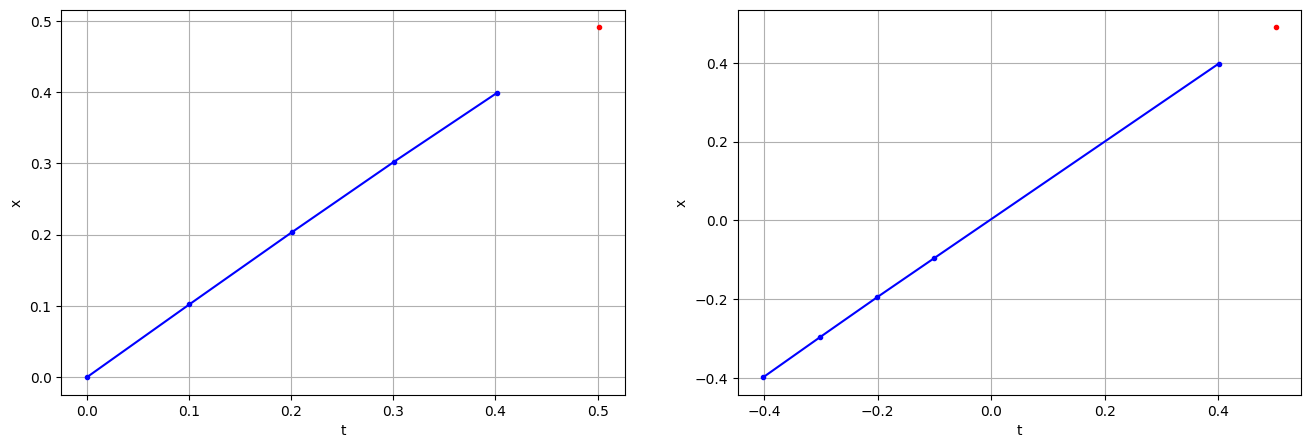

((5,), (294, 5, 2))

In [88]:
N = 300
t = np.linspace(0,30,N).reshape((N,1))
x = np.sin(t) + t*0.02
n = 2 # длина вектора примера([t, x]) -  варьируемый параметр
xLen = 5 # длина последовательности -  варьируемый параметр



h = 1  # горизонт прогноза -  варьируемый параметр
# TRAIN
xx = []
y = []
inputs_ = []
for i in range(N-xLen - h):
    xx.append(np.concatenate( (t[i:xLen+i],x[i:xLen+i])).reshape((xLen,2)))
    y.append(x[i+h+xLen-1])
    x_in = [np.array([t[i+j][0]-t[i+ xLen-1][0],x[i+j][0]-x[i + xLen-1][0]]) for j in range(xLen-1)] + [np.array([t[i+xLen-1][0],x[i+xLen-1][0]])]
    inputs_.append([x_in, x[i+h+xLen-1]])
xx = np.array(xx)  
y = np.array(y)

plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(t[0:xLen],x[0:xLen],'.-b')
plt.plot(t[xLen+h-1],y[0],'.r')
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1,2,2)
x_y = inputs_[0]
tt = np.array(x_y[0])[:, 0]
y = np.array(x_y[0])[:, 1]
plt.plot(tt,y,'.-b')
plt.plot(tt[-1]+30/N,x_y[1],'.r')
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

plt.show()
y.shape,xx.shape 

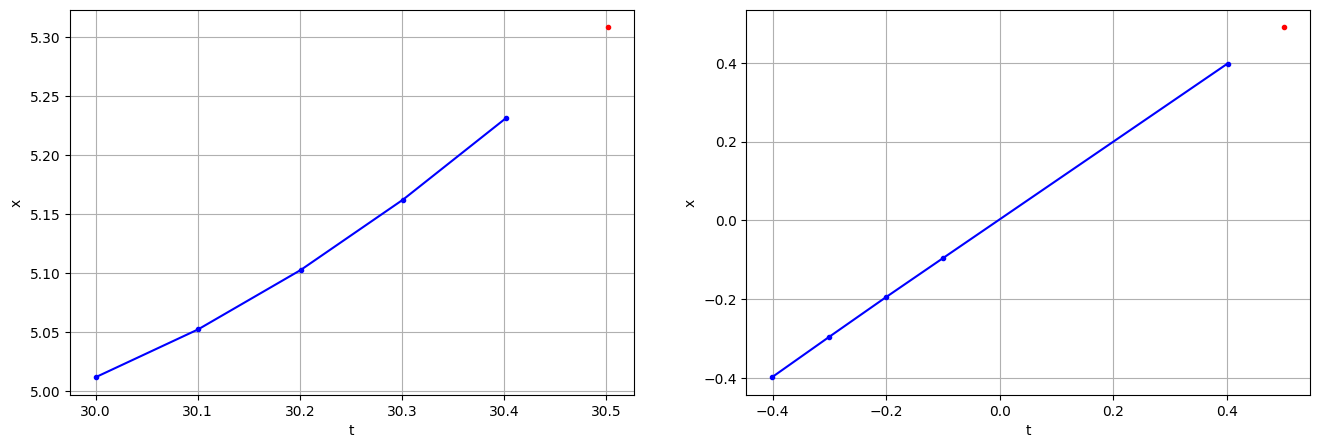

((5,), (294, 5, 2))

In [90]:

t = np.linspace(30,60,N).reshape((N,1))
x = np.sin(t) + t*0.2

xx = []
y = []
inputs_test = []
for i in range(N-xLen - h):
    xx.append(np.concatenate( (t[i:xLen+i],x[i:xLen+i])).reshape((xLen,2)))
    y.append(x[i+h+xLen-1])
    x_in = [np.array([t[i+j][0]-t[i+ xLen-1][0],x[i+j][0]-x[i + xLen-1][0]]) for j in range(xLen-1)] + [np.array([t[i+xLen-1][0],x[i+xLen-1][0]])]
    inputs_test.append([x_in, x[i+h+xLen-1]])
xx = np.array(xx)  
y = np.array(y)
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.plot(t[0:xLen],x[0:xLen],'.-b')
plt.plot(t[xLen+h-1],y[0],'.r')
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1,2,2)
x_y = inputs_[0]
tt = np.array(x_y[0])[:, 0]
y = np.array(x_y[0])[:, 1]
plt.plot(tt,y,'.-b')
plt.plot(tt[-1]+30/N,x_y[1],'.r')
plt.grid()
plt.xlabel('t')
plt.ylabel('x')

plt.show()
y.shape,xx.shape 

In [91]:
len(inputs_), len(inputs_test)

(294, 294)

In [92]:
# переходим к запуску всего процесса целиком   

# начальные ошибки и точность
loss = []
num_correct = []
loss_test = []
num_correct_test = []

print()
target_=[]
W=[]

# Цикл для каждого примера тренировки по всем эпохам
whh, wxh, why, by, bh =init(input_size=2, output_size=1, hidden_size=1)
last_hs=np.zeros(bh.shape)

# по эпохам
for epoch in range(8000):
        train_loss=0
        train_acc =0
        last_hs={}
        #print('epoch=',epoch)
        # по примерам
        for x_y in inputs_:
                # print(x_y)
                # строим пример
                inp_x = x_y[0]
                y = x_y[1]
                target = float(y[0]) # строим целевой вектор 0\1 
                
                #ПРЯМОЙ ПРОХОД
                out, h, last_h=forward(inputs=inp_x,Whh=whh,Wxh=wxh,Why=why,by=by,bh=bh)
                #вычислим результат
                # print(out)
                probs = out
                # print(probs)
                #
                # Считаем производную по потерям dL/dy 
                # 2 выхода probs-1 для того, что должно было быть и probs для второго варианта
                # т.е. если y=True, то  d_L_d_y[1]=probs-1, d_L_d_y[target]  
                d_L_d_y = probs.copy()
                d_L_d_y -= y
                #print(d_L_d_y)
                # Обратное распространение
                whh,wxh,why,by, bh = backprop(last_inputs=inp_x,d_y=d_L_d_y,last_hs=last_h, learn_rate=2e-5,Whh=whh,Wxh=wxh,Why=why, by=by,bh=bh)
                #print([whh[0,0],wxh[0,0],why[0,0],by[0], bh[0]])
                #print(out,probs,y,np.sum(np.log(probs[1])*y+np.log(probs[0])*(1-y)))
                train_loss += (probs[0] - y)**2
                train_acc += (probs[0] - y)**2
                W.append(bh.copy())
        if (epoch % 500) == 499:
            print("длина последовательности на входе: ", len(inp_x), ", длина вектора в последовательности: ", len(inp_x[0]))
            test_loss = 0
            test_acc = 0
            y_p = []
            y_t = []
            for x_y in inputs_test:
                inp_x = x_y[0]
                y = x_y[1]
                target = int(y) # строим целевой вектор 0\1 
                #print((whh))

                out, h, last_h=forward(inputs=inp_x, Whh=whh, Wxh=wxh, Why=why,by=by, bh=bh)
                #print('ghhgghhg:  ',x,y,': --- ',h.shape)
                probs =out
                y_p.append(probs[:,0].tolist())
                test_loss += (probs[0] - y)**2
                test_acc += (probs[0] - y)**2 
                y_t.append(y)
            
            print('Эпоха %d' % (epoch + 1))
            print('Train:\tошибка %.3f | mse: %.3f' % (train_loss/len(train_data.items()), train_acc/len(train_data.items())))
            print('Test:\tошибка %.3f | mse: %.3f' % (test_loss/len(test_data.items()), test_acc/len(test_data.items())))
            loss.append(train_loss/len(train_data.items()))
            num_correct.append(train_acc/len(train_data.items())) 
            loss_test.append(test_loss/len(test_data.items()))
            num_correct_test.append(test_acc/len(test_data.items())) 
W=np.array(W)
loss_test=np.array(loss_test)
num_correct_test=np.array(num_correct_test)
loss=np.array(loss)
num_correct=np.array(num_correct)


длина последовательности на входе:  5 , длина вектора в последовательности:  2
Эпоха 500
Train:	ошибка 2.551 | mse: 2.551
Test:	ошибка 1164.094 | mse: 1164.094


/var/folders/q0/6dg0mcx94x77w7989718hdbm0000gn/T/ipykernel_43292/306082169.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  target = int(y) # строим целевой вектор 0\1
/var/folders/q0/6dg0mcx94x77w7989718hdbm0000gn/T/ipykernel_43292/306082169.py:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Train:\tошибка %.3f | mse: %.3f' % (train_loss/len(train_data.items()), train_acc/len(train_data.items())))
/var/folders/q0/6dg0mcx94x77w7989718hdbm0000gn/T/ipykernel_43292/306082169.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element fro

длина последовательности на входе:  5 , длина вектора в последовательности:  2
Эпоха 1000
Train:	ошибка 1.945 | mse: 1.945
Test:	ошибка 1087.656 | mse: 1087.656
длина последовательности на входе:  5 , длина вектора в последовательности:  2
Эпоха 1500
Train:	ошибка 0.518 | mse: 0.518
Test:	ошибка 965.447 | mse: 965.447
длина последовательности на входе:  5 , длина вектора в последовательности:  2
Эпоха 2000
Train:	ошибка 0.150 | mse: 0.150
Test:	ошибка 927.692 | mse: 927.692
длина последовательности на входе:  5 , длина вектора в последовательности:  2
Эпоха 2500
Train:	ошибка 0.079 | mse: 0.079
Test:	ошибка 926.936 | mse: 926.936
длина последовательности на входе:  5 , длина вектора в последовательности:  2
Эпоха 3000
Train:	ошибка 0.061 | mse: 0.061
Test:	ошибка 928.542 | mse: 928.542
длина последовательности на входе:  5 , длина вектора в последовательности:  2
Эпоха 3500
Train:	ошибка 0.059 | mse: 0.059
Test:	ошибка 926.476 | mse: 926.476
длина последовательности на входе:  5 , длин

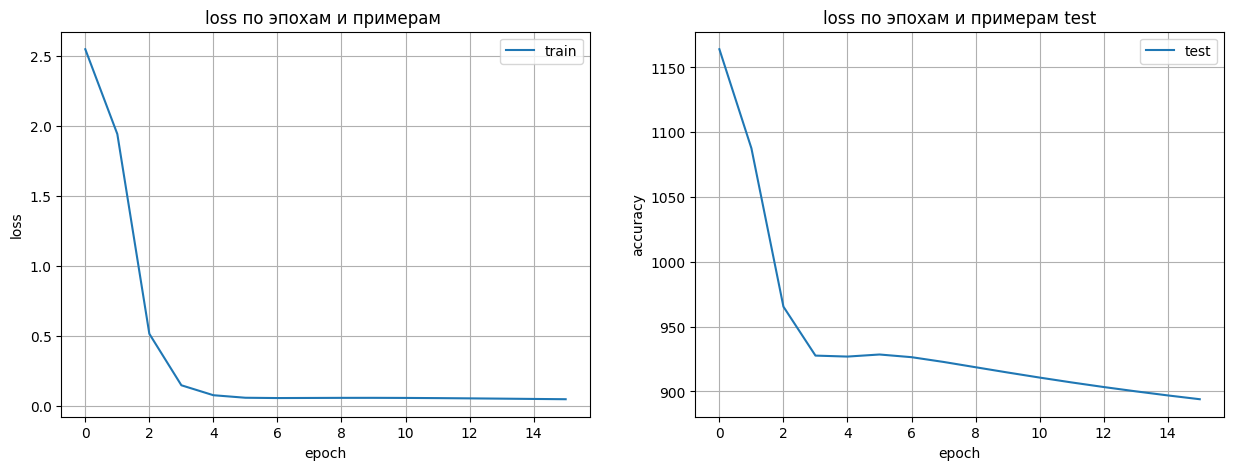

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('loss по эпохам и примерам ')
plt.plot(loss,label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()


plt.subplot(1,2,2)
plt.plot(loss_test,label='test')
plt.title('loss по эпохам и примерам test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

# Домашнее задание:
    
    1. Выбрать функцию для предсказания из списка по варианту
    2. Реализовать процесс предсказания значения функции в точке х на основе RNN модели по точкам х-1, х-2, ... ,х-n 
    3. Построить метрику качества в зависимости от числа нейронов и длины последовательности
    4* Использовать бибилиотеку для реализации Генетического Алгоритма (https://github.com/DEAP/deap, https://pygad.readthedocs.io/en/latest/ или любой удобный пакет) для подбора наиболее эффективного подмножества параметров модели
    
    Варианты:
    
<img src='images/вариант.png'>
        
    

Вариант 11: y = log_3(x) + ln(x) - e^x/arctg(x)

In [94]:
import numpy as np
import matplotlib.pyplot as plt


class RNN_Regression:
    def __init__(self, input_size=2, hidden_size=5, learning_rate=2e-5):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        
        self.Whh = None
        self.Wxh = None
        self.Why = None
        self.bh = None
        self.by = None
        
        self.init_weights()
    
    def init_weights(self):
        self.Whh = np.random.randn(self.hidden_size, self.hidden_size) / 1000
        self.Wxh = np.random.randn(self.hidden_size, self.input_size) / 1000
        self.Why = np.random.randn(1, self.hidden_size) / 1000
        self.bh = np.zeros((self.hidden_size, 1))
        self.by = np.zeros((1, 1))
    
    def forward(self, inputs):
        h = np.zeros((self.hidden_size, 1))
        last_hs = {0: h}
        
        for i, x in enumerate(inputs):
            x = np.array(x).reshape(-1, 1)
            h = np.tanh(np.dot(self.Wxh, x) + np.dot(self.Whh, h) + self.bh)
            last_hs[i + 1] = h
        
        y = np.dot(self.Why, h) + self.by
        return y, h, last_hs
    
    def backprop(self, last_inputs, last_hs, d_y):
        n = len(last_inputs)
        
        d_Why = d_y * last_hs[n].T
        d_by = d_y
        
        d_Whh = np.zeros(self.Whh.shape)
        d_Wxh = np.zeros(self.Wxh.shape)
        d_bh = np.zeros(self.bh.shape)
        
        d_h = np.dot(self.Why.T, d_y)
        
        for t in reversed(range(n)):
            temp = ((1 - last_hs[t + 1] ** 2) * d_h)
            d_bh += temp
            d_Whh += temp * last_hs[t].T
            x_t = np.array(last_inputs[t]).reshape(-1, 1)
            d_Wxh += temp * x_t.T
            d_h = np.dot(self.Whh, temp)
        
        for d in [d_Wxh, d_Whh, d_Why, d_bh, d_by]:
            np.clip(d, -1, 1, out=d)
        
        self.Whh -= self.learning_rate * d_Whh
        self.Wxh -= self.learning_rate * d_Wxh
        self.Why -= self.learning_rate * d_Why
        self.bh -= self.learning_rate * d_bh
        self.by -= self.learning_rate * d_by
    
    def fit(self, train_data, epochs=1000, verbose=False, verbose_step=500):
        history = {'train_loss': []}
        
        for epoch in range(epochs):
            train_loss = 0
            
            for inp_x, target_y in train_data:
                out, h, last_h = self.forward(inp_x)
                
                d_L_d_y = out - target_y
                self.backprop(inp_x, last_h, d_L_d_y)
                
                train_loss += (out[0, 0] - target_y) ** 2
            
            train_loss /= len(train_data)
            history['train_loss'].append(train_loss)
            
            if verbose and (epoch % verbose_step) == (verbose_step - 1):
                print(f'Epoch {epoch + 1}: MSE = {train_loss:.6f}')
        
        return history
    
    def predict(self, inputs):
        out, _, _ = self.forward(inputs)
        return out[0, 0]
    
    def evaluate(self, test_data):
        test_loss = 0
        predictions = []
        targets = []
        
        for inp_x, target_y in test_data:
            pred = self.predict(inp_x)
            predictions.append(pred)
            targets.append(target_y)
            test_loss += (pred - target_y) ** 2
        
        test_loss /= len(test_data)
        return test_loss, np.array(predictions), np.array(targets)


def create_time_series_data(t, x, window_size=5, horizon=1, relative=True):
    N = len(t)
    data = []
    
    for i in range(N - window_size - horizon):
        if relative:
            x_in = [
                np.array([
                    t[i+j][0] - t[i+window_size-1][0],
                    x[i+j][0] - x[i+window_size-1][0]
                ]) 
                for j in range(window_size-1)
            ] + [np.array([t[i+window_size-1][0], x[i+window_size-1][0]])]
        else:
            x_in = [
                np.array([t[i+j][0], x[i+j][0]]) 
                for j in range(window_size)
            ]
        
        target = x[i + horizon + window_size - 1][0]
        data.append((x_in, target))
    
    return data

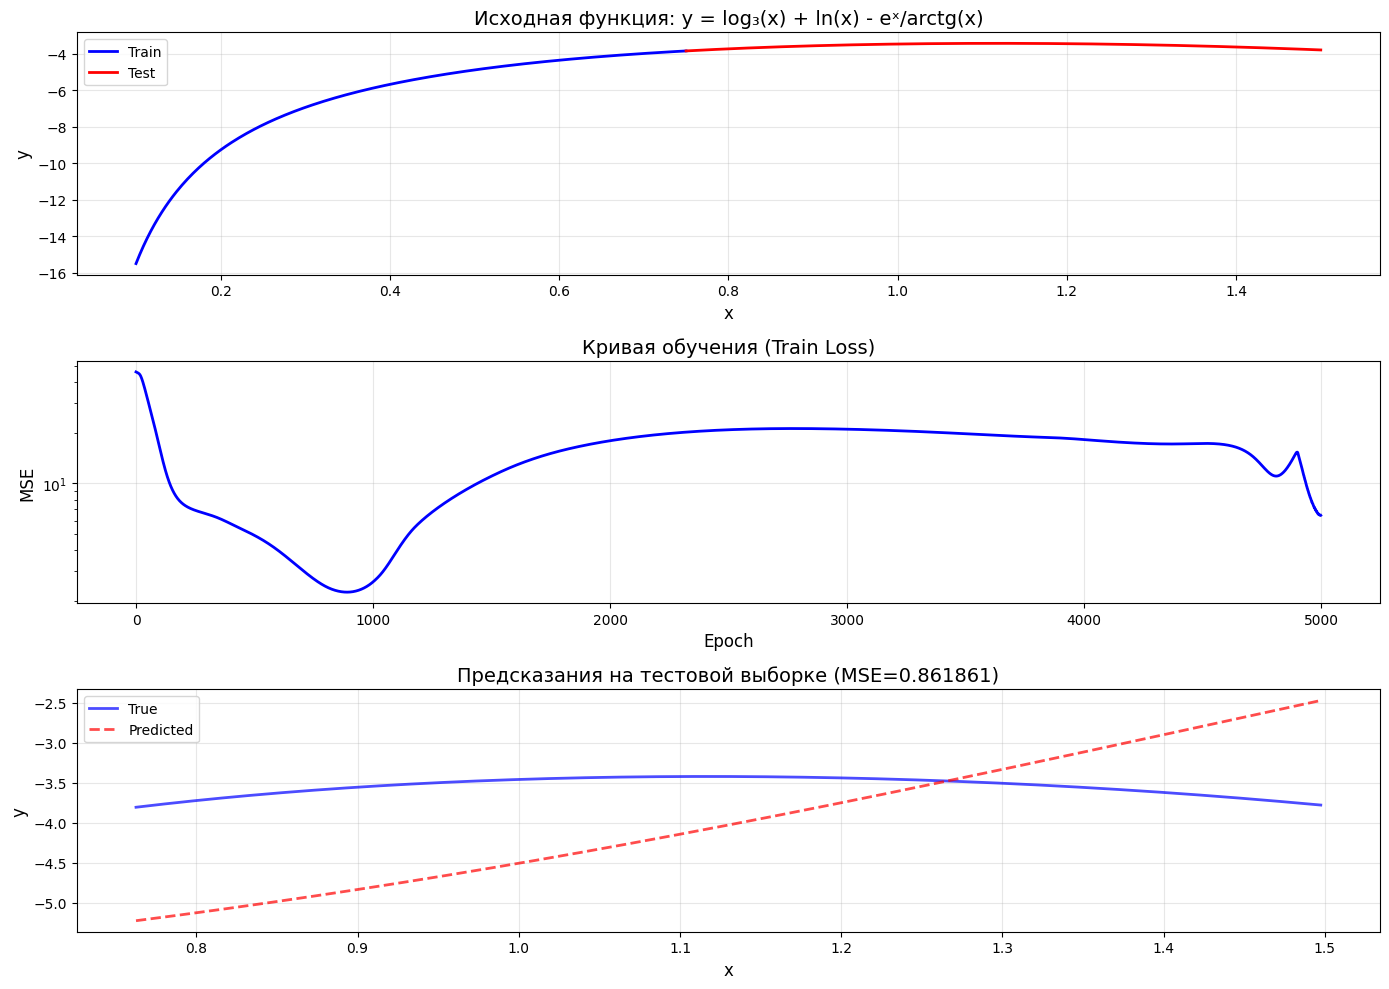

In [102]:
def my_function(x):
    return np.log(x) / np.log(3) + np.log(x) - np.exp(x) / np.arctan(x)
    #return np.sin(x) + 0.02 * x


N = 300
t_train = np.linspace(0.1, 0.75, N).reshape((N, 1))
x_train = my_function(t_train)

t_test = np.linspace(0.75, 1.5, N).reshape((N, 1))
x_test = my_function(t_test)

window_size = 5
horizon = 1

train_data = create_time_series_data(t_train, x_train, window_size=window_size, horizon=horizon)
test_data = create_time_series_data(t_test, x_test, window_size=window_size, horizon=horizon)

rnn = RNN_Regression(input_size=2, hidden_size=5, learning_rate=2e-5)
history = rnn.fit(train_data, epochs=5000, verbose=False)

test_mse, predictions, targets = rnn.evaluate(test_data)

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(t_train, x_train, 'b-', linewidth=2, label='Train')
plt.plot(t_test, x_test, 'r-', linewidth=2, label='Test')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Исходная функция: y = log₃(x) + ln(x) - eˣ/arctg(x)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(history['train_loss'], 'b-', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Кривая обучения (Train Loss)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.subplot(3, 1, 3)
test_x = t_test[window_size+horizon-1:window_size+horizon-1+len(targets)]
plt.plot(test_x, targets, 'b-', linewidth=2, label='True', alpha=0.7)
plt.plot(test_x, predictions, 'r--', linewidth=2, label='Predicted', alpha=0.7)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Предсказания на тестовой выборке (MSE={test_mse:.6f})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


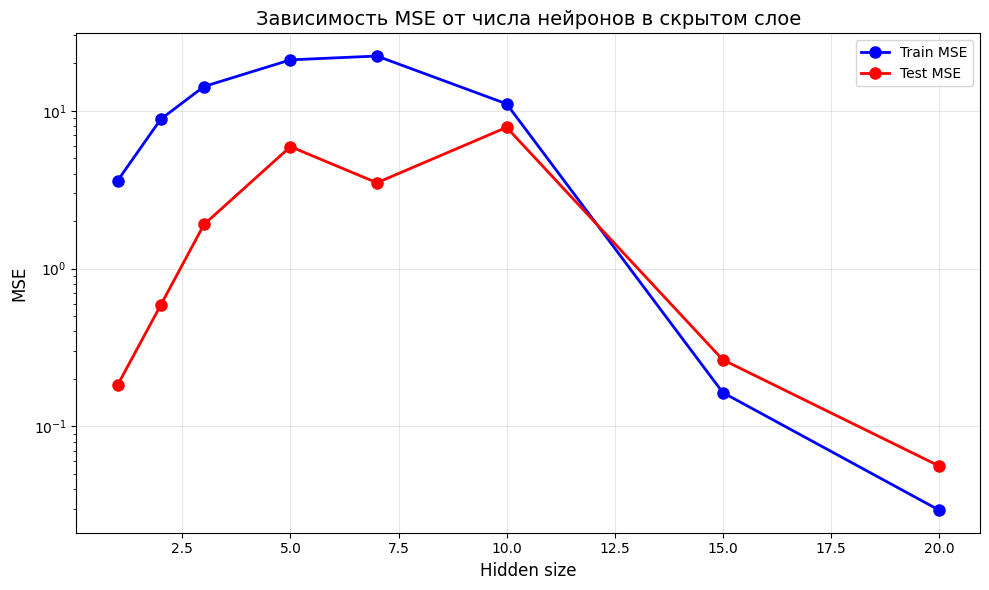

In [103]:
window_size = 5
horizon = 1

train_data = create_time_series_data(t_train, x_train, window_size=window_size, horizon=horizon)
test_data = create_time_series_data(t_test, x_test, window_size=window_size, horizon=horizon)

hidden_sizes = [1, 2, 3, 5, 7, 10, 15, 20]
train_mses = []
test_mses = []

np.random.seed(42)

for hs in hidden_sizes:
    rnn = RNN_Regression(input_size=2, hidden_size=hs, learning_rate=2e-5)
    history = rnn.fit(train_data, epochs=3000, verbose=False)
    
    train_mse = history['train_loss'][-1]
    test_mse, _, _ = rnn.evaluate(test_data)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)

plt.figure(figsize=(10, 6))
plt.plot(hidden_sizes, train_mses, 'bo-', linewidth=2, markersize=8, label='Train MSE')
plt.plot(hidden_sizes, test_mses, 'ro-', linewidth=2, markersize=8, label='Test MSE')
plt.xlabel('Hidden size', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Зависимость MSE от числа нейронов в скрытом слое', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

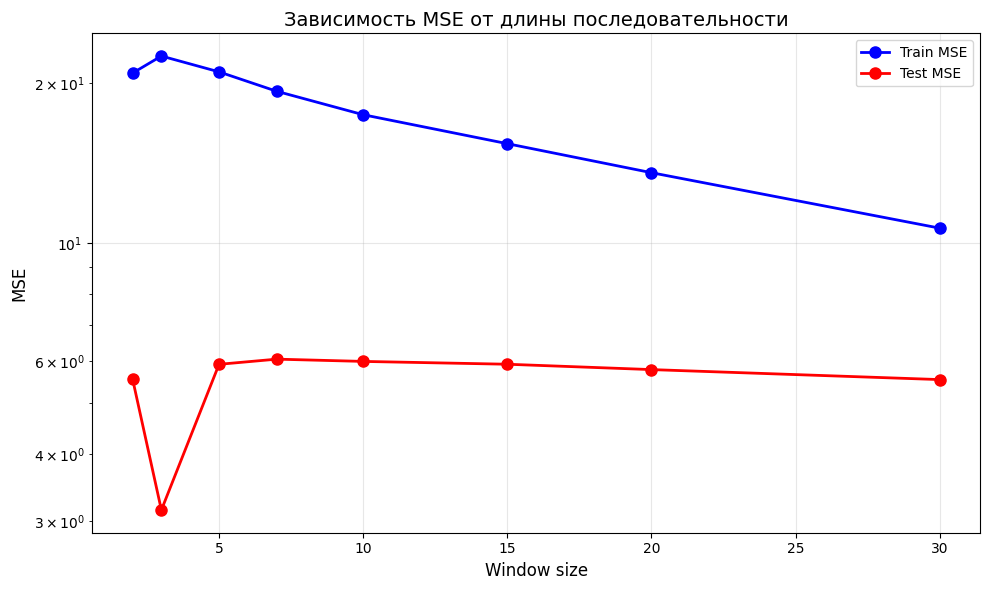

In [104]:
hidden_size = 5
horizon = 1

window_sizes = [2, 3, 5, 7, 10, 15, 20, 30]
train_mses = []
test_mses = []

np.random.seed(42)

for ws in window_sizes:    
    train_data = create_time_series_data(t_train, x_train, window_size=ws, horizon=horizon)
    test_data = create_time_series_data(t_test, x_test, window_size=ws, horizon=horizon)
    
    rnn = RNN_Regression(input_size=2, hidden_size=hidden_size, learning_rate=2e-5)
    history = rnn.fit(train_data, epochs=3000, verbose=False)
    
    train_mse = history['train_loss'][-1]
    test_mse, _, _ = rnn.evaluate(test_data)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, train_mses, 'bo-', linewidth=2, markersize=8, label='Train MSE')
plt.plot(window_sizes, test_mses, 'ro-', linewidth=2, markersize=8, label='Test MSE')
plt.xlabel('Window size', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Зависимость MSE от длины последовательности', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

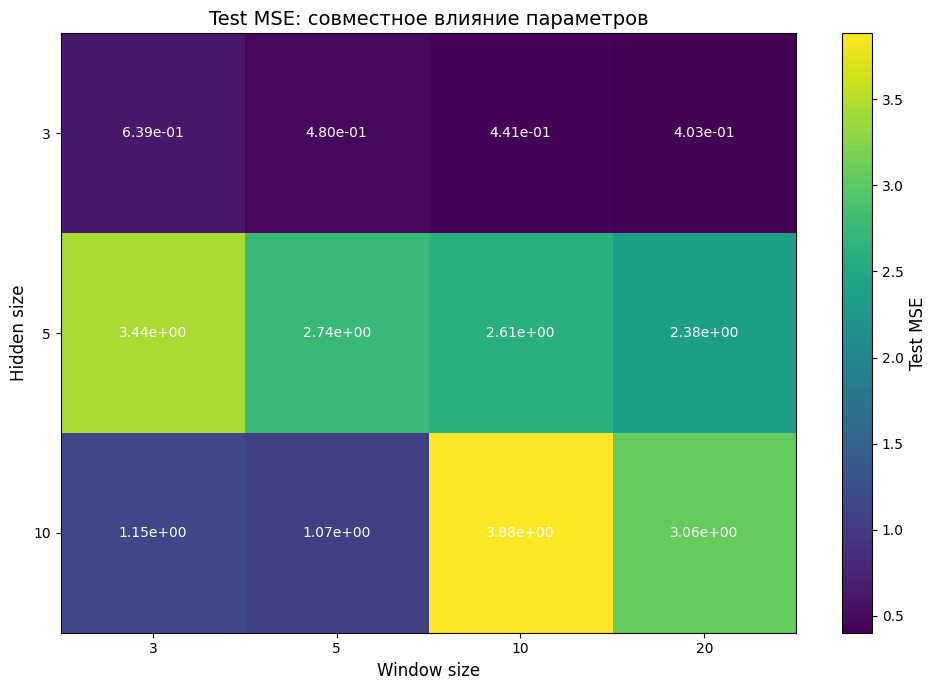

In [105]:
horizon = 1

hidden_sizes = [3, 5, 10]
window_sizes = [3, 5, 10, 20]

results = np.zeros((len(hidden_sizes), len(window_sizes)))

np.random.seed(42)

for i, hs in enumerate(hidden_sizes):
    for j, ws in enumerate(window_sizes):        
        train_data = create_time_series_data(t_train, x_train, window_size=ws, horizon=horizon)
        test_data = create_time_series_data(t_test, x_test, window_size=ws, horizon=horizon)
        
        rnn = RNN_Regression(input_size=2, hidden_size=hs, learning_rate=2e-5)
        rnn.fit(train_data, epochs=2000, verbose=False)
        
        test_mse, _, _ = rnn.evaluate(test_data)
        results[i, j] = test_mse
        
fig, ax = plt.subplots(figsize=(10, 7))
im = ax.imshow(results, cmap='viridis', aspect='auto')

ax.set_xticks(np.arange(len(window_sizes)))
ax.set_yticks(np.arange(len(hidden_sizes)))
ax.set_xticklabels(window_sizes)
ax.set_yticklabels(hidden_sizes)

ax.set_xlabel('Window size', fontsize=12)
ax.set_ylabel('Hidden size', fontsize=12)
ax.set_title('Test MSE: совместное влияние параметров', fontsize=14)

for i in range(len(hidden_sizes)):
    for j in range(len(window_sizes)):
        text = ax.text(j, i, f'{results[i, j]:.2e}',
                      ha="center", va="center", color="w", fontsize=10)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Test MSE', fontsize=12)

plt.tight_layout()
plt.show()